In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import glob
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat

import IfA_Smeargle as ifa

In [2]:
newconfig = ifa.yankee.SmeargleConfig('test.ifaspkl')

In [ ]:
newconfig.BravoConfig.detector_name

In [ ]:
newconfig.BravoConfig.voltpat_rename_config['archive_data'] = False

In [ ]:
newconfig.BravoConfig.voltpat_rename_config['begin_garbage'] = 1

In [ ]:
print(newconfig)

In [ ]:
#ifa.bravo.bravo_execution_saphria('./Data',newconfig)

In [ ]:
ifa.zulu.pipelines.saphria_reduction_pipeline('./Data',newconfig)

In [ ]:
wee = ifa.oscar.multi.plot_single_heatmap_and_histogram('./Data\\TestArray__detBias;11.5Vup,007__.fits',configuration_class=newconfig)

In [ ]:
newconfig.BravoConfig.voltpat_rename_config['begin_garbage'] = 1

In [ ]:
glob.glob('./Data//*', recursive=True)

In [ ]:
top_range, bottom_range, width = (0,100,2.5)

bins = np.arange(top_range,bottom_range, width)
bins = np.append(bins, bottom_range)
print(bins)

In [2]:
first_run = ifa.yankee.SmeargleConfig('FirstRun.ifaspkl')
print(first_run)

first_run.BravoConfig.voltpat_rename_config['archive_data'] = False


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'Saphria'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5], 'begin_garbage': 1, 'archive_data': True}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': False, 'x_range': None, 'y_range': None}
╟  echo170_config ⇀ {'run': False, 'sigma_multiple': 2}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo271_config ⇀ {'run': False, 'maximum_value':

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:75: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled.
  smeargle_warning(DataWarning,("This a 3D data frame with nan/null values. Frames "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:87: RuntimeWarning: invalid value encountered in less
  if (np.any(np.where(np.logical_or(illogical_low > hdu_data, hdu_data > illogical_high)))):
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:87: RuntimeWarning: invalid value encountered in greater
  if (np.any(np.where(np.logical_or(illogical_low > hdu_data, hdu_data > illogical_high)))):
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:75: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled.
  smeargle_warning(DataWarning,("This a 3D data frame with nan/null values. Frames "
C:\Users\Tripp\Desktop\PROG

./Data\Saphria__num;10__detBias;10.5Vdown.fits
./Data\Saphria__num;10__detBias;10.5Vdown__1025-1040.fits
./Data\Saphria__num;10__detBias;10.5Vdown__257-272.fits
./Data\Saphria__num;10__detBias;10.5Vdown__513-528.fits
./Data\Saphria__num;11__detBias;9.5Vdown.fits
./Data\Saphria__num;11__detBias;9.5Vdown__1025-1040.fits
./Data\Saphria__num;11__detBias;9.5Vdown__257-272.fits
./Data\Saphria__num;11__detBias;9.5Vdown__513-528.fits
./Data\Saphria__num;12__detBias;8.5Vdown.fits
./Data\Saphria__num;12__detBias;8.5Vdown__1025-1040.fits
./Data\Saphria__num;12__detBias;8.5Vdown__257-272.fits
./Data\Saphria__num;12__detBias;8.5Vdown__513-528.fits
./Data\Saphria__num;13__detBias;6.5Vdown.fits
./Data\Saphria__num;13__detBias;6.5Vdown__1025-1040.fits
./Data\Saphria__num;13__detBias;6.5Vdown__257-272.fits
./Data\Saphria__num;13__detBias;6.5Vdown__513-528.fits
./Data\Saphria__num;14__detBias;4.5Vdown.fits
./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits
./Data\Saphria__num;14__detBias;4.5Vdown_

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:115: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "


./Data\Saphria__num;10__detBias;10.5Vdown__1025-1040.fits
{'mean': -2729.0, 'stddev': 4.029452936375715, 'amplitude': 96}
[6.83333333 5.94545455 5.76923077 6.         6.         7.75
 5.5875     5.8        9.48863636 6.58571429 6.         6.6
 5.21590909]
./Data\Saphria__num;10__detBias;10.5Vdown__257-272.fits
{'mean': -1023.0, 'stddev': 18.420750214627102, 'amplitude': 526}
[ 5.425       6.25        6.          5.4375      7.625       5.0625
  7.01785714  8.46581197 43.37755102]
./Data\Saphria__num;10__detBias;10.5Vdown__513-528.fits
{'mean': -3241.0, 'stddev': 3.6037196520800254, 'amplitude': 131}
[5.         5.         5.41818182 5.6875     5.89423077 8.48611111
 5.74652778 5.91666667]
./Data\Saphria__num;11__detBias;9.5Vdown.fits
./Data\Saphria__num;11__detBias;9.5Vdown__1025-1040.fits
{'mean': -515.0, 'stddev': 20.74733388813985, 'amplitude': 944}
[ 5.33333333  5.33333333  5.08333333  5.08333333  9.71428571  9.71428571
  6.84210526 19.86225266 48.85623679]
./Data\Saphria__num;11__

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:75: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled.
  smeargle_warning(DataWarning,("This a 3D data frame with nan/null values. Frames "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:87: RuntimeWarning: invalid value encountered in less
  if (np.any(np.where(np.logical_or(illogical_low > hdu_data, hdu_data > illogical_high)))):
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:87: RuntimeWarning: invalid value encountered in greater
  if (np.any(np.where(np.logical_or(illogical_low > hdu_data, hdu_data > illogical_high)))):


./Data\Saphria__num;15__detBias;2.5Vdown__1025-1040.fits
{'mean': -95.0, 'stddev': 0.9281171070704961, 'amplitude': 30489}
[2.18554873]
./Data\Saphria__num;15__detBias;2.5Vdown__257-272.fits


C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\modeling_and_fitting.py:158: DataWarning: Nyquist peaks cannot be found, relying on 1-bin wide peaks for estimates. Estimates may be very off.
  smeargle_warning(DataWarning,("Nyquist peaks cannot be found, relying on 1-bin "


{'mean': -71.0, 'stddev': 0.7029324657069427, 'amplitude': 40679}
[1.65527943 0.9986965 ]
./Data\Saphria__num;15__detBias;2.5Vdown__513-528.fits
{'mean': -84.0, 'stddev': 0.8054567959260593, 'amplitude': 35745}
[1.89670577 1.25604297]
./Data\Saphria__num;16__detBias;2.5Vup.fits
./Data\Saphria__num;16__detBias;2.5Vup__1025-1040.fits
{'mean': -91.0, 'stddev': 0.9553157949841172, 'amplitude': 29884}
[2.24959674]
./Data\Saphria__num;16__detBias;2.5Vup__257-272.fits
{'mean': -77.0, 'stddev': 0.8182337471831084, 'amplitude': 37817}
[1.92679319 0.99483289]
./Data\Saphria__num;16__detBias;2.5Vup__513-528.fits
{'mean': -88.0, 'stddev': 0.7847314572866749, 'amplitude': 36087}
[1.84790133 0.98825467]
./Data\Saphria__num;17__detBias;4.5Vup.fits
./Data\Saphria__num;17__detBias;4.5Vup__1025-1040.fits
{'mean': -166.0, 'stddev': 1.9973982406790585, 'amplitude': 14589}
[4.70351333]
./Data\Saphria__num;17__detBias;4.5Vup__257-272.fits
{'mean': -106.0, 'stddev': 1.2293021482770985, 'amplitude': 24632}
[2

./Data\Saphria__num;28__detBias;4.5Vdown.fits
./Data\Saphria__num;28__detBias;4.5Vdown__1025-1040.fits


C:\Users\Tripp\.conda\envs\Anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


{'mean': -122.0, 'stddev': 1.652259371002029, 'amplitude': 17207}
[3.89077341]
./Data\Saphria__num;28__detBias;4.5Vdown__257-272.fits
{'mean': -94.0, 'stddev': 1.0845476452784304, 'amplitude': 28176}
[2.55391449]
./Data\Saphria__num;28__detBias;4.5Vdown__513-528.fits
{'mean': -117.0, 'stddev': 1.3811739446264304, 'amplitude': 20905}
[3.25241603]
./Data\Saphria__num;29__detBias;2.5Vdown.fits
./Data\Saphria__num;29__detBias;2.5Vdown__1025-1040.fits
{'mean': -107.0, 'stddev': 0.9823994798239454, 'amplitude': 28850}
[2.31337394]
./Data\Saphria__num;29__detBias;2.5Vdown__257-272.fits
{'mean': -74.0, 'stddev': 0.7157907495487424, 'amplitude': 40150}
[1.68555837 1.59184252]
./Data\Saphria__num;29__detBias;2.5Vdown__513-528.fits
{'mean': -92.0, 'stddev': 0.8064496074230048, 'amplitude': 35402}
[1.89904366 0.99181063]
./Data\Saphria__num;2__detBias;2.5Vup.fits
./Data\Saphria__num;2__detBias;2.5Vup__1025-1040.fits
{'mean': -34.0, 'stddev': 0.9413799381912066, 'amplitude': 29626}
[2.21678031]
./D

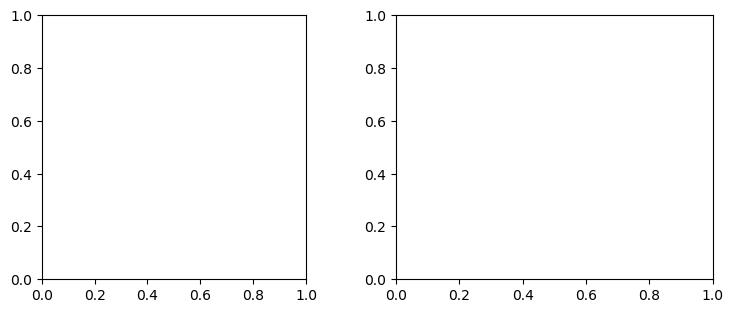

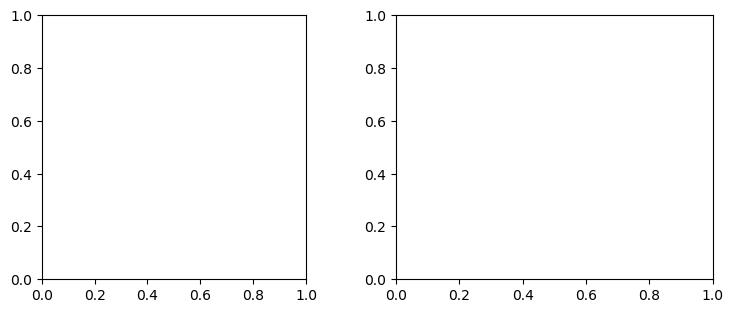

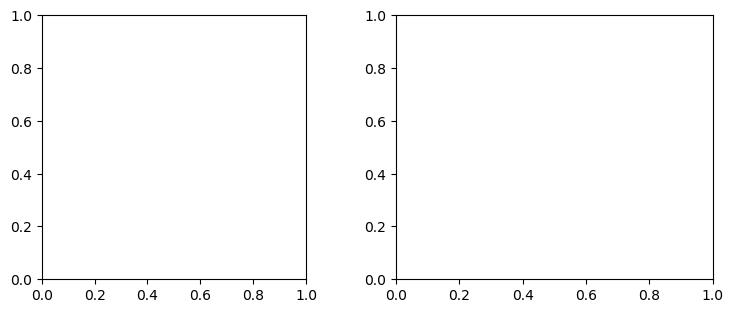

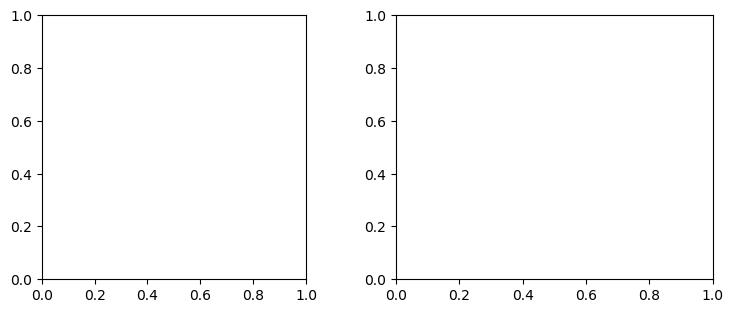

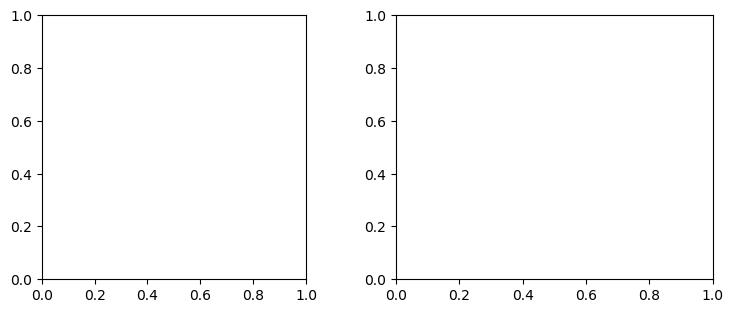

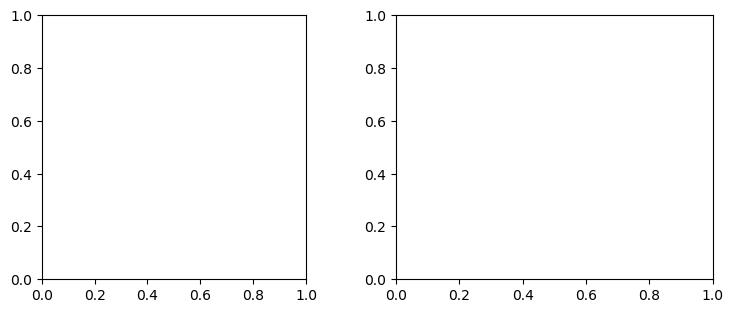

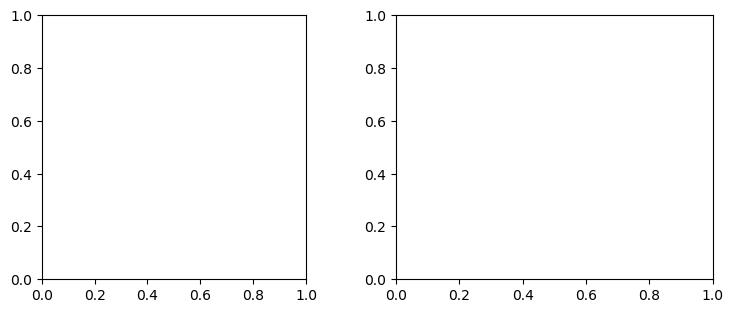

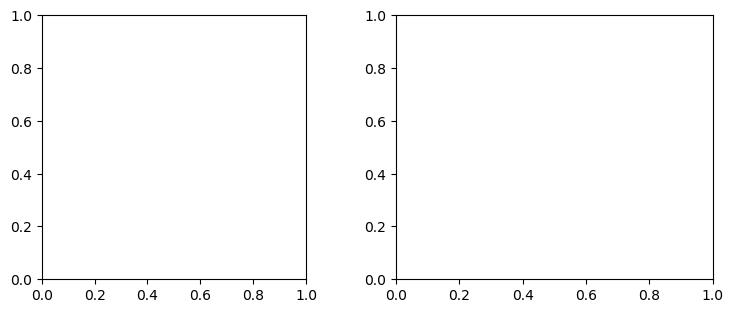

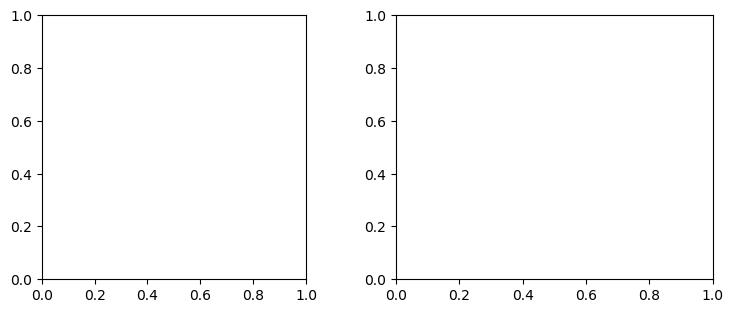

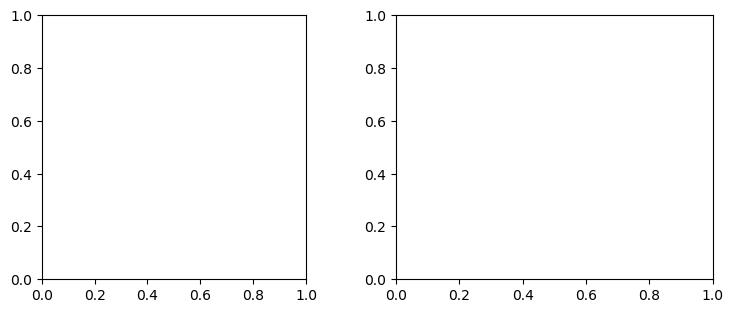

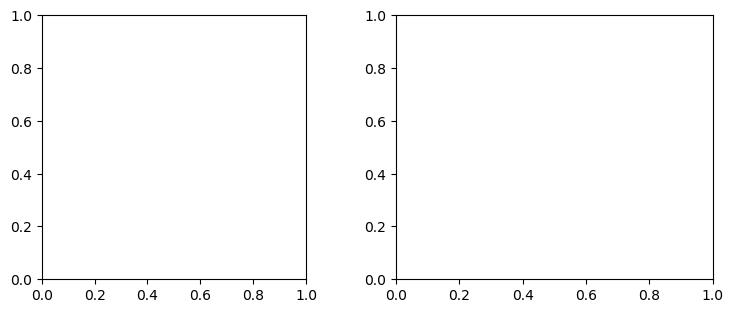

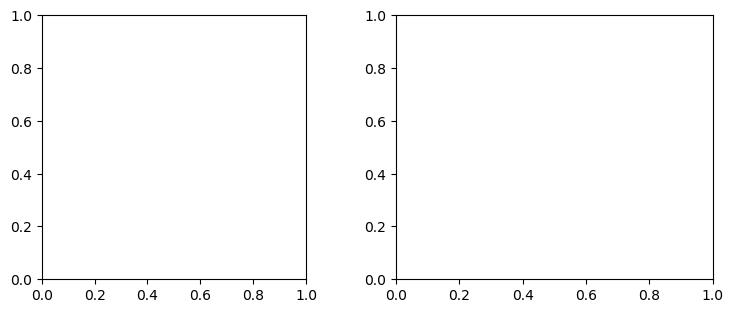

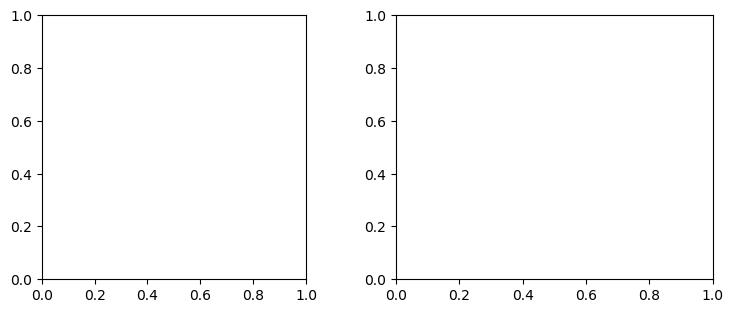

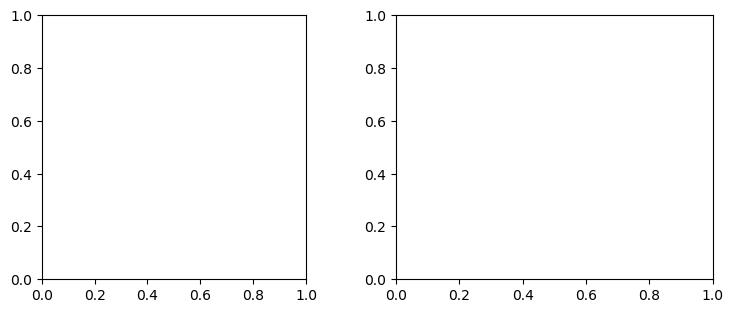

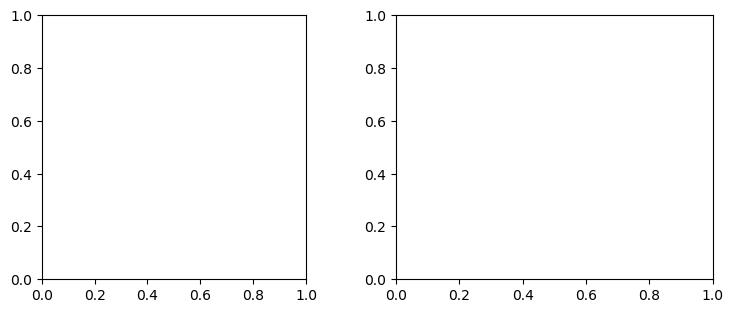

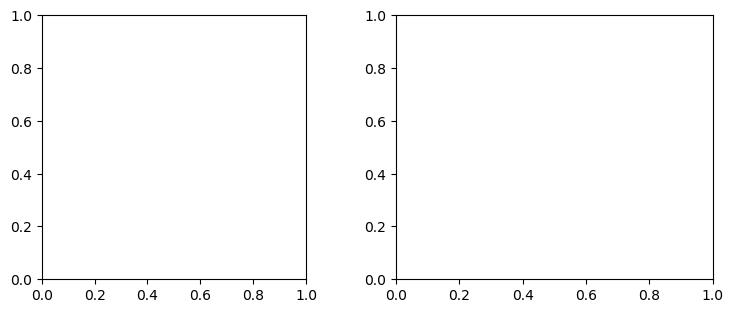

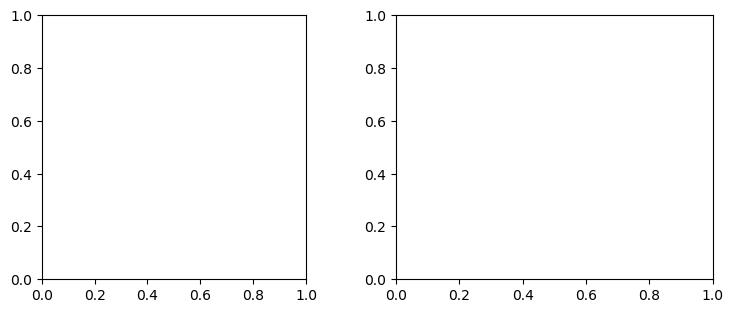

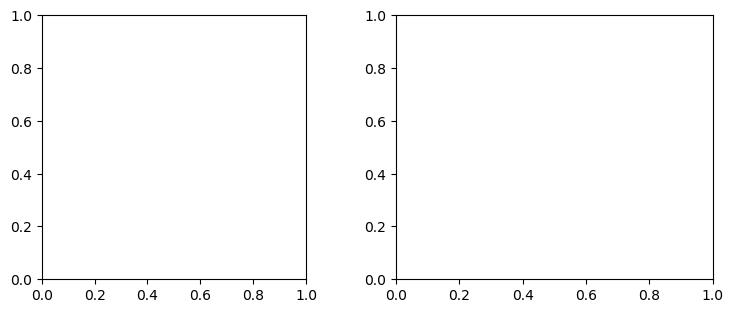

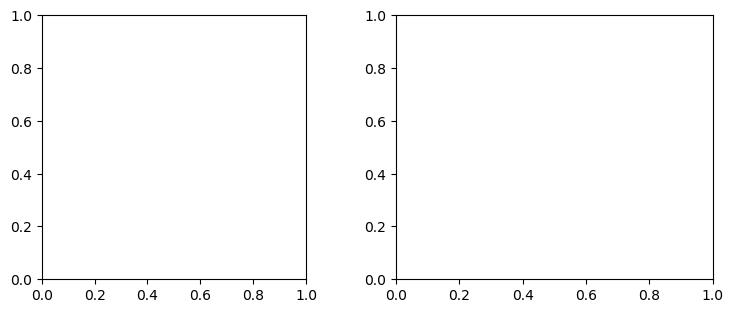

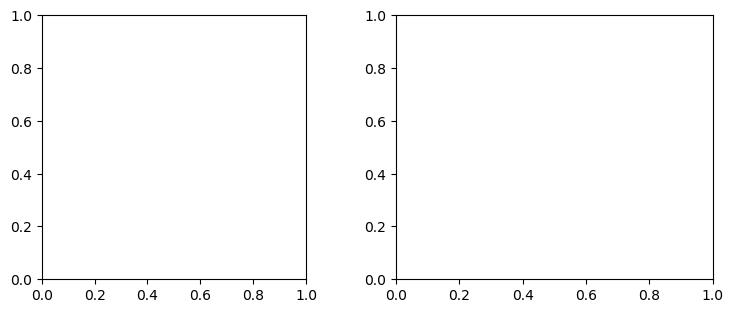

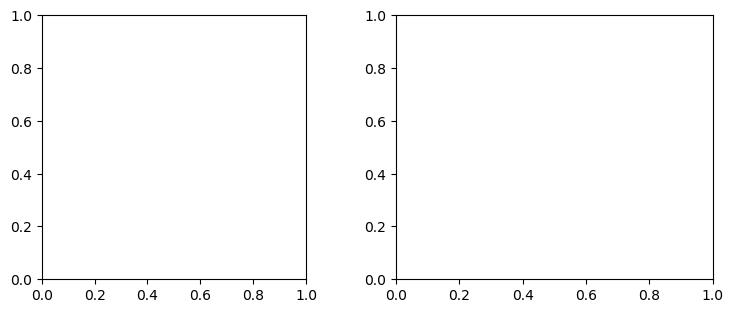

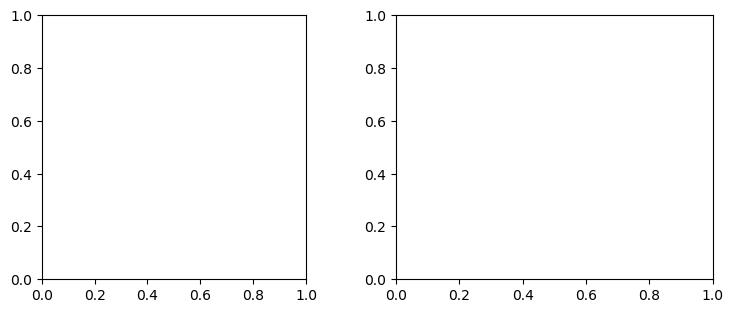

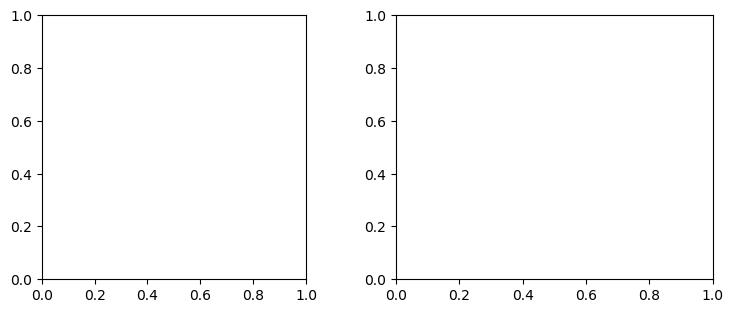

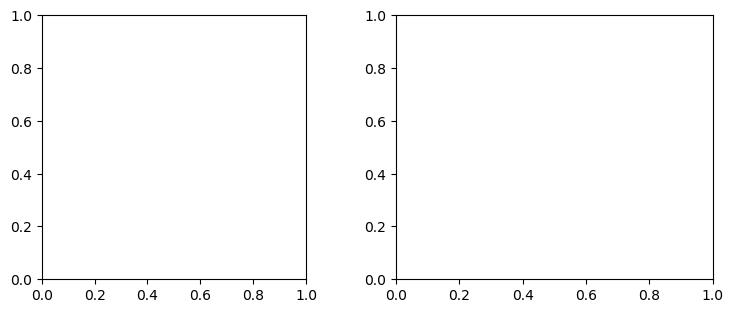

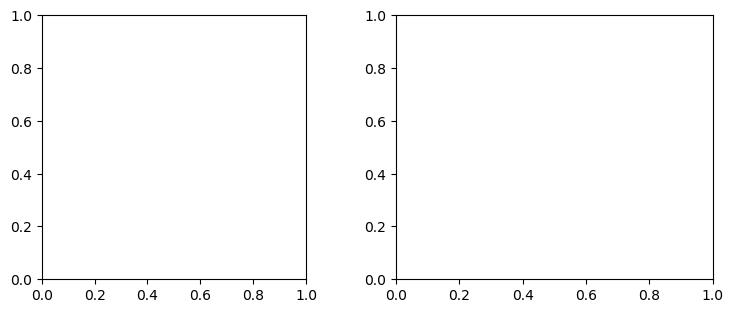

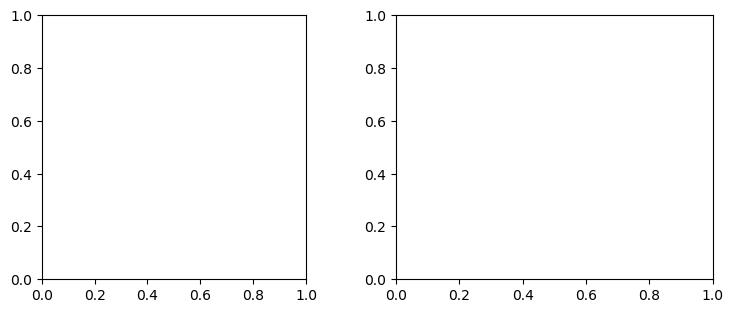

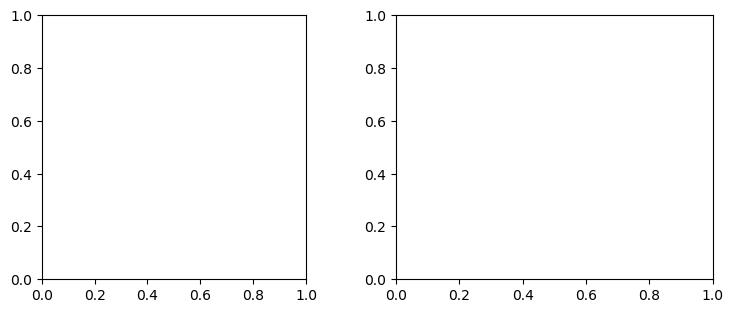

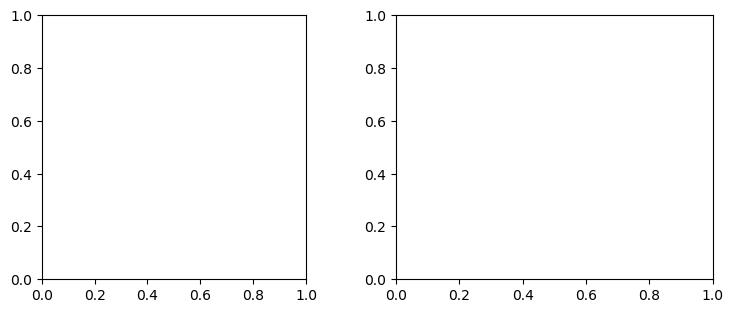

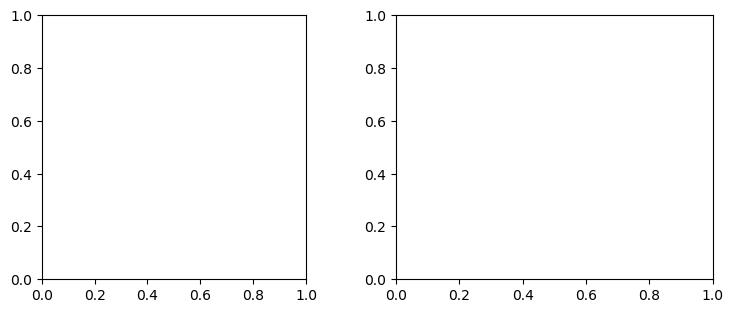

In [3]:
ifa.zulu.pipelines.SA201907281826_reduction_pipeline('./Data',first_run)

In [6]:
__, __, data = ifa.meta.meta_faa.smeargle_open_fits_file("./Data/Saphria__num;19__detBias;8.5Vup__1025-1040.fits")

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:115: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "


In [5]:
data
print(np.nanmean(data.data),np.nanstd(data.data))

-730.506 1618.4441


3.7454587722392354
3.7454587722392354
{'mean': -137.0, 'stddev': 1.5905499240872913, 'amplitude': 16789}
[3.74545877]


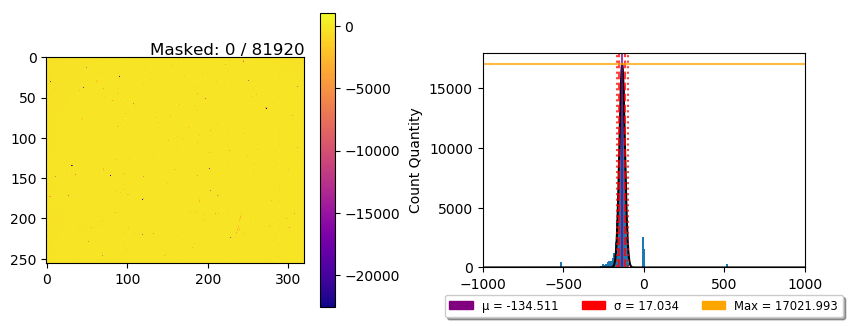

In [7]:
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-1000,1000]

figure = ifa.oscar.multi.plot_single_heatmap_and_histogram("./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits",first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure)

{'mean': -137.0, 'stddev': 3925.3531055452218, 'amplitude': 16789}
(array([3.74545877]), array([9243.5]), array([4.41766439]), array([8.16312317]))


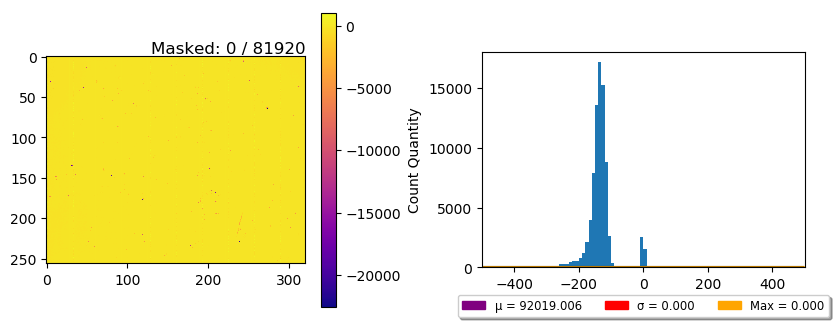

(array([    1,     8,     2,     3,     3,     7,    14,    26,   139,
       81717], dtype=int64), array([-22542. , -20185.4, -17828.8, -15472.2, -13115.6, -10759. ,
        -8402.4,  -6045.8,  -3689.2,  -1332.6,   1024. ], dtype=float32))


In [9]:
first_run.OscarConfig.general_histogram_config['fit_gaussian'] = True
first_run.OscarConfig.general_histogram_config['bin_width'] = 10
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-500,500]

__, __, data = ifa.meta.meta_faa.smeargle_open_fits_file("./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits")
figure2 = ifa.oscar.multi.plot_single_heatmap_and_histogram(data.data,first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)

# [ 72 120 136 250 294]
#[-16074. -14058. -13386.  -8598.  -6750.]

print(np.histogram(data.data,bins=10))

{'mean': -449.0, 'stddev': 16819.119932733713, 'amplitude': 79086}
(array([0.85714286, 1.15      , 0.85185185, 0.67615176, 1.00610843]), array([   41.5,    43.5,    51.5,   465. , 39606. ]), array([ 0.5       ,  2.5       ,  5.64814815, 10.82384824, 13.49389157]), array([ 1.35714286,  3.65      ,  6.5       , 11.5       , 14.5       ]))


C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\modeling_and_fitting.py:150: DataWarning: Nyquist peaks cannot be found, relying on 1-bin wide peaks for estimates. Estimates may be very off.
  smeargle_warning(DataWarning,("Nyquist peaks cannot be found, relying on 1-bin "


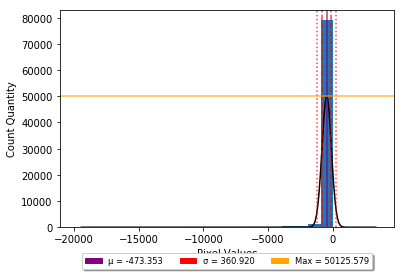

AttributeError: module 'IfA_Smeargle.meta.plotting' has no attribute 'smeargle_fit_histogram_gaussian_function'

In [10]:
__, __, data = ifa.meta.meta_faa.smeargle_open_fits_file("./Data\Saphria__num;12__detBias;8.5Vdown__257-272.fits")
figure2 = ifa.oscar.histograms.plot_array_histogram(data.data,bin_width=1000,fit_gaussian=True)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)

wee, weer = ifa.meta.meta_plting.smeargle_fit_histogram_gaussian_function(data.data)

print(np.nanstd(data))

In [12]:
# Extract histogram data from the data.
hist_data = np.histogram(data.data, bins=ifa.oscar.oscar_bin_width(data.data, 10))
hist_x = (hist_data[1][0:-1] + hist_data[1][1:]) / 2 # Middle of bin.
hist_y = hist_data[0]
   # Filter out some of the outlier pixels, consider only 75% of the 
    # meaningful bins and the bins with a value greater than a limiting entry.
valuecut_index = np.where(hist_y >= 11)
cuthist_x = np.array(hist_x[valuecut_index])
cuthist_y = np.array(hist_y[valuecut_index])

    # Initial guesses...
    # The peak of the data is a good guess for the mean value.
guess_mean = hist_x[np.argmax(cuthist_y)]
print(np.nanstd(cuthist_y))
print(sp_stat.median_absolute_deviation(cuthist_y))
print(sp_stat.variation(cuthist_y))

1607.766251649564
39.2889
2.765480595889764


In [22]:
print(cuthist_y.tolist())

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 